In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve, learning_curve


In [2]:
data = pd.read_excel('/Users/user/Library/CloudStorage/OneDrive-TheUniversityofManchester/PDRA/Sequencing/stoke_imapact_data/Manchester_WithMeans_250612.xlsx')
ella_data = pd.read_excel('/Users/user/Library/CloudStorage/OneDrive-TheUniversityofManchester/PDRA/Sequencing/stoke_imapact_data/250401_MCR_Ella.xlsx')

In [3]:
ella_data = ella_data.replace('ND',np.nan)
ella_data['IL18_V3'].astype('float64')
ella_data['PDGFBB_V4'].astype('float64')

/var/folders/fl/6_t6qhvs76j4qwb25hhq9qj80000gp/T/ipykernel_96313/4183169611.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ella_data = ella_data.replace('ND',np.nan)


0      505.0
1      584.0
2      370.0
3      528.0
4        NaN
       ...  
185      NaN
186      NaN
187      NaN
188      NaN
189      NaN
Name: PDGFBB_V4, Length: 190, dtype: float64

In [4]:
ella_data

,Study_ID,CCL2_V2,CCL2_V3,CCL2_V4,CCL2_V5,CCL3_V2,CCL3_V3,CCL3_V4,CCL3_V5,CD163_V2,...,MMP9_V4,MMP9_V5,PDGFBB_V2,PDGFBB_V3,PDGFBB_V4,PDGFBB_V5,sIL6R_V2,sIL6R_V3,sIL6R_V4,sIL6R_V5
0,4133-001,219.0,NaN,343.0,NaN,20.0,NaN,23.5,NaN,558.7,...,212.732,NaN,289.0,NaN,505.0,NaN,42.5,NaN,51.3,NaN
1,4133-002,180.0,198.0,217.0,198.0,28.4,23.7,42.1,32.3,224.3,...,69.953,64.484,63.4,175.0,584.0,190.0,34.7,38.6,37.2,40.4
2,4133-003,244.0,NaN,301.0,NaN,49.2,NaN,56.4,NaN,498.6,...,47.339,NaN,407.0,NaN,370.0,NaN,45.3,NaN,64.5,NaN
3,4133-004,275.0,264.0,294.0,215.0,30.1,37.7,47.1,30.2,381.0,...,213.855,49.476,146.0,166.0,528.0,220.0,47.9,46.9,47.9,43.2
4,4133-005,232.0,NaN,NaN,NaN,53.4,NaN,NaN,NaN,484.6,...,NaN,NaN,287.0,NaN,NaN,NaN,48.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,4133-203,254.0,NaN,NaN,NaN,48.4,NaN,NaN,NaN,443.5,...,NaN,NaN,755.0,NaN,NaN,NaN,50.6,NaN,NaN,NaN
186,4133-204,307.0,NaN,NaN,NaN,41.8,NaN,NaN,NaN,609.9,...,NaN,NaN,667.0,NaN,NaN,NaN,78.6,NaN,NaN,NaN
187,4133-205,151.0,NaN,NaN,NaN,29.1,NaN,NaN,NaN,897.7,...,NaN,NaN,198.0,NaN,NaN,NaN,68.7,NaN,NaN,NaN
188,4133-206,617.0,NaN,NaN,NaN,51.4,NaN,NaN,NaN,939.0,...,NaN,NaN,484.0,NaN,NaN,NaN,40.3,NaN,NaN,NaN


In [5]:
for col in ella_data.columns[1:]:
    col_mean = ella_data[col].mean()
    ella_data[col] = ella_data[col].fillna(col_mean)


In [6]:
ella_data

,Study_ID,CCL2_V2,CCL2_V3,CCL2_V4,CCL2_V5,CCL3_V2,CCL3_V3,CCL3_V4,CCL3_V5,CD163_V2,...,MMP9_V4,MMP9_V5,PDGFBB_V2,PDGFBB_V3,PDGFBB_V4,PDGFBB_V5,sIL6R_V2,sIL6R_V3,sIL6R_V4,sIL6R_V5
0,4133-001,219.0,242.175258,343.000000,222.8,20.0,37.191753,23.500000,40.14,558.7,...,212.732000,83.6396,289.0,362.789032,505.00000,382.2,42.5,47.986598,51.30000,45.4
1,4133-002,180.0,198.000000,217.000000,198.0,28.4,23.700000,42.100000,32.30,224.3,...,69.953000,64.4840,63.4,175.000000,584.00000,190.0,34.7,38.600000,37.20000,40.4
2,4133-003,244.0,242.175258,301.000000,222.8,49.2,37.191753,56.400000,40.14,498.6,...,47.339000,83.6396,407.0,362.789032,370.00000,382.2,45.3,47.986598,64.50000,45.4
3,4133-004,275.0,264.000000,294.000000,215.0,30.1,37.700000,47.100000,30.20,381.0,...,213.855000,49.4760,146.0,166.000000,528.00000,220.0,47.9,46.900000,47.90000,43.2
4,4133-005,232.0,242.175258,244.339623,222.8,53.4,37.191753,36.366038,40.14,484.6,...,193.510755,83.6396,287.0,362.789032,454.94717,382.2,48.7,47.986598,49.25283,45.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,4133-203,254.0,242.175258,244.339623,222.8,48.4,37.191753,36.366038,40.14,443.5,...,193.510755,83.6396,755.0,362.789032,454.94717,382.2,50.6,47.986598,49.25283,45.4
186,4133-204,307.0,242.175258,244.339623,222.8,41.8,37.191753,36.366038,40.14,609.9,...,193.510755,83.6396,667.0,362.789032,454.94717,382.2,78.6,47.986598,49.25283,45.4
187,4133-205,151.0,242.175258,244.339623,222.8,29.1,37.191753,36.366038,40.14,897.7,...,193.510755,83.6396,198.0,362.789032,454.94717,382.2,68.7,47.986598,49.25283,45.4
188,4133-206,617.0,242.175258,244.339623,222.8,51.4,37.191753,36.366038,40.14,939.0,...,193.510755,83.6396,484.0,362.789032,454.94717,382.2,40.3,47.986598,49.25283,45.4


In [7]:
full_data = pd.concat([data, ella_data])

In [8]:
full_data.drop(columns=['Study_ID'])

,gender 🔒,Age_years 🔒,Ethnicity 🔒,NIHSS 🔒,Date_of_Enrollment,Time_of_symptom_onset 🔒,Time_symptoms_were_recognized 🔒,Time_last_known_well_(LKW) 🔒,Date/Time_Blood_Drawn_,blooddrawdiff,...,MMP9_V4,MMP9_V5,PDGFBB_V2,PDGFBB_V3,PDGFBB_V4,PDGFBB_V5,sIL6R_V2,sIL6R_V3,sIL6R_V4,sIL6R_V5
0,Male,58.0,White,3.0,2021-08-05,2021-08-03 09:30:00,NaT,NaT,2021-08-06 08:30:00,71.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,70.0,White,2.0,2021-08-08,2021-08-06 21:36:00,NaT,NaT,2021-08-09 08:21:00,58.75000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,59.0,BlackBritishAfricanorCarribean,4.0,2021-08-10,NaT,2021-08-08 07:30:00,2021-08-07 23:00:00,2021-08-11 10:28:00,74.96667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,76.0,White,13.0,2021-08-10,2021-08-09 06:45:00,NaT,NaT,2021-08-11 08:48:00,50.05000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,69.0,White,3.0,2021-08-16,2021-08-15 07:45:00,NaT,NaT,2021-08-17 09:30:00,49.75000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,...,193.510755,83.6396,755.0,362.789032,454.94717,382.2,50.6,47.986598,49.25283,45.4
186,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,...,193.510755,83.6396,667.0,362.789032,454.94717,382.2,78.6,47.986598,49.25283,45.4
187,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,...,193.510755,83.6396,198.0,362.789032,454.94717,382.2,68.7,47.986598,49.25283,45.4
188,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,...,193.510755,83.6396,484.0,362.789032,454.94717,382.2,40.3,47.986598,49.25283,45.4


In [9]:
col_to_remove = ['Date_of_Enrollment',
'Time_of_symptom_onset 🔒',
'Time_symptoms_were_recognized 🔒',
'Time_last_known_well_(LKW) 🔒',
'Date/Time_Blood_Drawn_',
'blooddrawdiff',
'MoCA_V2',
'MoCA_V3',
'MoCA_V4',
'MoCA_V5',
'6mo_imaging',
'30mo_imaging',
'Qualifying_Stroke_Date',
'V3_Date',
'V4_Date',
'V5_Date',
'V3_Post_Stroke_Days',
'V4_Post_Stroke_Days',
'V5_Post_Stroke_Days',
'TimePoint.x',
'I_feel_fatigued.x',
'I_feel_weak_all_over.x',
"I_feel_listless_('washed_out').x",
'I_feel_tired.x',
'I_have_trouble_starting_things_because_I_am_tired.x',
'I_have_trouble_finishing_things_because_I_am_tired.x',
'I_have_energy.x',
'I_am_able_to_do_my_usual_activities.x',
'I_need_to_sleep_during_the_day.x',
'I_am_too_tired_to_eat.x',
'I_need_help_doing_my_usual_activities.x',
'I_am_frustrated_by_being_too_tired_to_do_the_things_I_want_to_do.x',
'I_have_to_limit_my_social_activity_because_I_am_tired.x',
'FACIT_Fatigue_Scale_Total_(prorated,_if_answers_missing)_.x',
'Are_you_basically_satisfied_with_your_life?.x',
'Have_you_dropped_many_of_your_activities_and_interests?.x',
'Do_you_feel_that_your_life_is_empty?.x',
'Do_you_often_get_bored?.x',
'Are_you_in_good_spirits_most_of_the_time?.x',
'Are_you_afraid_that_something_bad_is_going_to_happen_to_you?.x',
'Do_you_feel_happy_most_of_the_time?.x',
'Do_you_often_feel_helpless?.x',
'Do_you_prefer_to_stay_at_home,_rather_than_going_out_and_doing_things?.x',
'Do_you_feel_that_you_have_more_problems_with_memory_than_most?.x',
'Do_you_think_it_is_wonderful_to_be_alive_now?.x',
'Do_you_feel_worthless_the_way_you_are_now?.x',
'Do_you_feel_full_of_energy?.x',
'Do_you_feel_that_your_situation_is_hopeless?.x',
'Do_you_think_that_most_people_are_better_off_than_you_are?.x',
'TimePoint.y',
'I_feel_fatigued.y',
'I_feel_weak_all_over.y',
"I_feel_listless_('washed_out').y",
'I_feel_tired.y',
'I_have_trouble_starting_things_because_I_am_tired.y',
'I_have_trouble_finishing_things_because_I_am_tired.y',
'I_have_energy.y',
'I_am_able_to_do_my_usual_activities.y',
'I_need_to_sleep_during_the_day.y',
'I_am_too_tired_to_eat.y',
'I_need_help_doing_my_usual_activities.y',
'I_am_frustrated_by_being_too_tired_to_do_the_things_I_want_to_do.y',
'I_have_to_limit_my_social_activity_because_I_am_tired.y',
'FACIT_Fatigue_Scale_Total_(prorated,_if_answers_missing)_.y',
'Are_you_basically_satisfied_with_your_life?.y',
'Have_you_dropped_many_of_your_activities_and_interests?.y',
'Do_you_feel_that_your_life_is_empty?.y',
'Do_you_often_get_bored?.y',
'Are_you_in_good_spirits_most_of_the_time?.y',
'Are_you_afraid_that_something_bad_is_going_to_happen_to_you?.y',
'Do_you_feel_happy_most_of_the_time?.y',
'Do_you_often_feel_helpless?.y',
'Do_you_prefer_to_stay_at_home,_rather_than_going_out_and_doing_things?.y',
'Do_you_feel_that_you_have_more_problems_with_memory_than_most?.y',
'Do_you_think_it_is_wonderful_to_be_alive_now?.y',
'Do_you_feel_worthless_the_way_you_are_now?.y',
'Do_you_feel_full_of_energy?.y',
'Do_you_feel_that_your_situation_is_hopeless?.y',
'Do_you_think_that_most_people_are_better_off_than_you_are?.y',
'TimePoint',
'I_feel_fatigued',
'I_feel_weak_all_over',
"I_feel_listless_('washed_out')",
'I_feel_tired',
'I_have_trouble_starting_things_because_I_am_tired',
'I_have_trouble_finishing_things_because_I_am_tired',
'I_have_energy',
'I_am_able_to_do_my_usual_activities',
'I_need_to_sleep_during_the_day',
'I_am_too_tired_to_eat',
'I_need_help_doing_my_usual_activities',
'I_am_frustrated_by_being_too_tired_to_do_the_things_I_want_to_do',
'I_have_to_limit_my_social_activity_because_I_am_tired',
'FACIT_Fatigue_Scale_Total_(prorated,_if_answers_missing)_',
'Are_you_basically_satisfied_with_your_life?',
'Have_you_dropped_many_of_your_activities_and_interests?',
'Do_you_feel_that_your_life_is_empty?',
'Do_you_often_get_bored?',
'Are_you_in_good_spirits_most_of_the_time?',
'Are_you_afraid_that_something_bad_is_going_to_happen_to_you?',
'Do_you_feel_happy_most_of_the_time?',
'Do_you_often_feel_helpless?',
'Do_you_prefer_to_stay_at_home,_rather_than_going_out_and_doing_things?',
'Do_you_feel_that_you_have_more_problems_with_memory_than_most?',
'Do_you_think_it_is_wonderful_to_be_alive_now?',
'Do_you_feel_worthless_the_way_you_are_now?',
'Do_you_feel_full_of_energy?',
'Do_you_feel_that_your_situation_is_hopeless?',
'Do_you_think_that_most_people_are_better_off_than_you_are?',
'Normed_MoCA_V3',
'Normed_MoCA_V4',
'Normed_MoCA_V2']


full_data = full_data.drop(columns=col_to_remove)

In [10]:
print(full_data['Normed_MoCA_V5'])
list(full_data.dtypes)
full_data = full_data.dropna(subset=['Normed_MoCA_V5'])

0      27.0
1      27.0
2       NaN
3      26.0
4       NaN
       ... 
185     NaN
186     NaN
187     NaN
188     NaN
189     NaN
Name: Normed_MoCA_V5, Length: 386, dtype: float64


In [11]:
categorical_cols = full_data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    full_data[col] = le.fit_transform(full_data[col].astype(str)) 

In [12]:
print("Category Mapping:", le.classes_)

Category Mapping: ['nan' 'osteomyelitis']


In [13]:
X = full_data.drop(columns='Normed_MoCA_V5')
y = full_data['Normed_MoCA_V5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [14]:
full_data

,Study_ID,gender 🔒,Age_years 🔒,Ethnicity 🔒,NIHSS 🔒,Lesion_Location,Lacunar,IV_Thrombolysis 🔒,IA_Thrombectomy 🔒,stroke_AMPM 🔒,...,MMP9_V4,MMP9_V5,PDGFBB_V2,PDGFBB_V3,PDGFBB_V4,PDGFBB_V5,sIL6R_V2,sIL6R_V3,sIL6R_V4,sIL6R_V5
0,0,1,58.00,2,3.000000,2,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,70.00,2,2.000000,1,2,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1,76.00,2,13.000000,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,3,1,47.00,1,5.000000,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,4,1,61.00,2,1.000000,1,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,5,1,65.00,2,0.000000,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,6,1,48.00,2,1.000000,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,7,0,79.00,2,0.000000,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,8,1,60.00,2,6.000000,1,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,9,1,77.00,2,0.000000,1,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
bst = XGBRegressor(
    n_estimators=100,
    max_depth=3,        
    learning_rate=0.3,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=1.0,
    gamma=1.0,
    random_state=8,
    # early_stopping_rounds=100,
    # eval_metric='mae',
)

# Train 
bst.fit(X_train, y_train, 
        eval_set=[(X_val, y_val)], 
        verbose=False)

# predictions
preds = bst.predict(X_val)

importance = bst.feature_importances_
feature_names = X_train.columns

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)

mse = mean_squared_error(y_val, preds)
r2 = r2_score(y_val, preds)
mae = np.mean(np.abs(y_val - preds))

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 19.86
R² Score: 0.107
Mean Absolute Error: 3.10


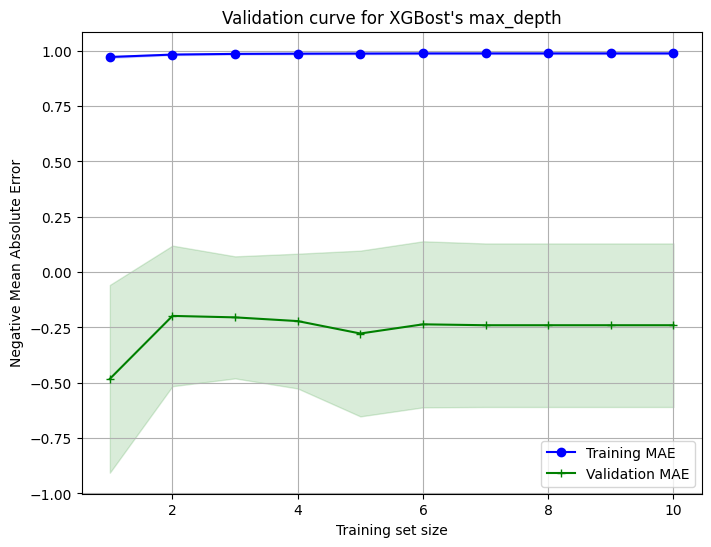

In [22]:
# Calculate learning curves
param_range = np.arange(1, 11)

train_scores, test_scores = validation_curve(
    estimator=bst,
    X=X,
    y=y,
    cv=5,
    scoring='r2',
    param_name="max_depth",
    param_range=param_range,
    error_score='raise',
    n_jobs=-1)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', label='Training MAE')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', marker='+', label='Validation MAE')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title("Validation curve for XGBost's max_depth")
plt.xlabel('Training set size')
plt.ylabel('Negative Mean Absolute Error')
plt.grid()
plt.legend(loc='lower right')
plt.show()

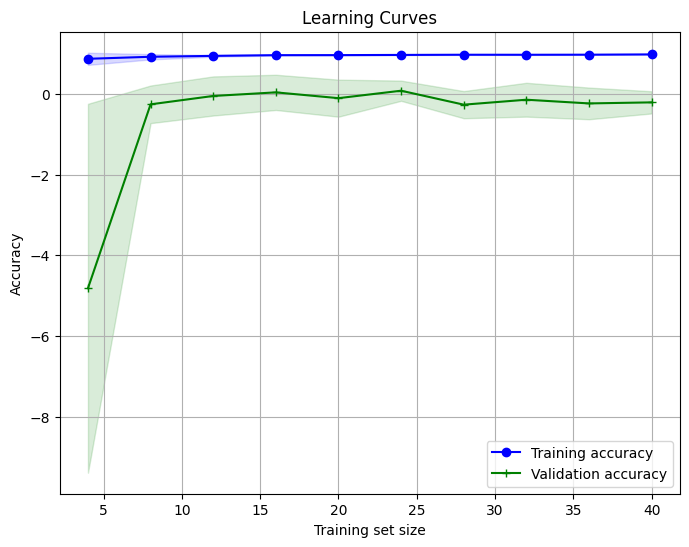

In [23]:
#Calculate Learning Curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=bst,
    X=X,
    y=y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2',
    error_score='raise',
    n_jobs=-1)


# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curves')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [25]:
print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Get predictions for the TEST set (not validation set)
test_preds = bst.predict(X_test)

# And see which patients were predicted
results = pd.DataFrame({
    'Row_Index': X_test.index,
    'Actual_MoCA': y_test.values,
    'Predicted_MoCA': test_preds,  # Use test predictions
    'Error': y_test.values - test_preds  # Use test predictions for error
})
print(results.head())

print("Top 10 Worst Important Features:")
print(feature_importance.tail(10))

Top 10 Most Important Features:
              Feature  Importance
15  Total_Cholesterol    0.187804
2         Age_years 🔒    0.162878
32      GlobalTest_V4    0.111558
54     Hypertension 🔒    0.106880
39    Visuospatial_V5    0.060148
33    GlobalDomain_V4    0.055455
0            Study_ID    0.035252
22         MemFact_V3    0.032668
17         Direct_LDL    0.032055
18              HbA1C    0.030156
   Row_Index  Actual_MoCA  Predicted_MoCA     Error
0         33         24.0       26.262030 -2.262030
1         86         27.0       18.817244  8.182756
2         69         22.0       21.988379  0.011621
3        191         24.8       23.779619  1.020381
4         40         25.0       25.307684 -0.307684
Top 10 Worst Important Features:
                   Feature  Importance
66        ACE_Inhibitors 🔒         0.0
65   antihyperlipidemics 🔒         0.0
64         Antidiabetics 🔒         0.0
63         Antiplatelets 🔒         0.0
62        Anticoagulants 🔒         0.0
61         no_m